# **NASA - TURBOFAN DEGRADATION:**

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.4 MB/s 


In [ ]:
#Import necessary packages
import numpy as np 
import pandas as pd 
import shap
from scipy.stats import iqr as sc
import statsmodels.api as sm
pd.set_option('max_columns', 100)

#visualizing
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

#metrics and split
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#model imports
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  ExtraTreesRegressor
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import f_regression
from sklearn.metrics import recall_score,classification_report
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score


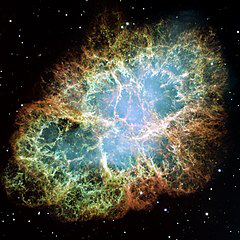

In [ ]:
from skimage import io
img = io.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Crab_Nebula.jpg/240px-Crab_Nebula.jpg')
fig = px.imshow(img)
fig.show()

In [ ]:
# define column names for easy indexing
index_names = ['engine', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['sensor_{}'.format(i) for i in range(1,22)] 
col_names = index_names + setting_names + sensor_names

In [ ]:
# load the dataset
train = pd.read_csv(('/content/drive/MyDrive/Colab Notebooks/test_FD001.txt'), sep='\s+', header=None, names=col_names)
test = pd.read_csv(('/content/drive/MyDrive/Colab Notebooks/test_FD001.txt'), sep='\s+', header=None, names=col_names)
y_test = pd.read_csv(('/content/drive/MyDrive/Colab Notebooks/test_FD001.txt'), sep='\s+', header=None, names=['RUL'])

In [ ]:
train.head(3)

engine  cycle  setting_1  setting_2  setting_3  sensor_1  sensor_2  \
0       1      1     0.0023     0.0003      100.0    518.67    643.02   
1       1      2    -0.0027    -0.0003      100.0    518.67    641.71   
2       1      3     0.0003     0.0001      100.0    518.67    642.46   

   sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  sensor_8  sensor_9  \
0   1585.29   1398.21     14.62     21.61    553.90   2388.04   9050.17   
1   1588.45   1395.42     14.62     21.61    554.85   2388.01   9054.42   
2   1586.94   1401.34     14.62     21.61    554.11   2388.05   9056.96   

   sensor_10  sensor_11  sensor_12  sensor_13  sensor_14  sensor_15  \
0        1.3       47.2     521.72    2388.03    8125.55     8.4052   
1        1.3       47.5     522.16    2388.06    8139.62     8.3803   
2        1.3       47.5     521.97    2388.03    8130.10     8.4441   

   sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  
0       0.03        392       2388      100.0      38.86    23.3735  
1       0.03        393       2388      100.0      39.02    23.3916  
2       0.03        393       2388      100.0      39.08    23.4166

In [ ]:
test.head(3)

engine  cycle  setting_1  setting_2  setting_3  sensor_1  sensor_2  \
0       1      1     0.0023     0.0003      100.0    518.67    643.02   
1       1      2    -0.0027    -0.0003      100.0    518.67    641.71   
2       1      3     0.0003     0.0001      100.0    518.67    642.46   

   sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  sensor_8  sensor_9  \
0   1585.29   1398.21     14.62     21.61    553.90   2388.04   9050.17   
1   1588.45   1395.42     14.62     21.61    554.85   2388.01   9054.42   
2   1586.94   1401.34     14.62     21.61    554.11   2388.05   9056.96   

   sensor_10  sensor_11  sensor_12  sensor_13  sensor_14  sensor_15  \
0        1.3       47.2     521.72    2388.03    8125.55     8.4052   
1        1.3       47.5     522.16    2388.06    8139.62     8.3803   
2        1.3       47.5     521.97    2388.03    8130.10     8.4441   

   sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  
0       0.03        392       2388      100.0      38.86    23.3735  
1       0.03        393       2388      100.0      39.02    23.3916  
2       0.03        393       2388      100.0      39.08    23.4166

In [ ]:
y_test.head(3)

RUL
1 1  0.0023  0.0003 100.0 518.67 643.02 1585.29 1398.21 14.62 21.61 553.90 2388.04 9050.17 1.3 47.2 521.72 2388.03 8125.55 8.4052 0.03 392 2388 100.0 38.86  23.3735
  2 -0.0027 -0.0003 100.0 518.67 641.71 1588.45 1395.42 14.62 21.61 554.85 2388.01 9054.42 1.3 47.5 522.16 2388.06 8139.62 8.3803 0.03 393 2388 100.0 39.02  23.3916
  3  0.0003  0.0001 100.0 518.67 642.46 1586.94 1401.34 14.62 21.61 554.11 2388.05 9056.96 1.3 47.5 521.97 2388.03 8130.10 8.4441 0.03 393 2388 100.0 39.08  23.4166

**Wrangling & Visuals**

In [ ]:
#group test data by engine
test_df= test.groupby('engine').agg({'cycle':'max'})
test_df.head()

cycle
engine       
1          31
2          49
3         126
4         106
5          98

In [ ]:
#add cycle to y_test
y_test['cycle'] = test_df['cycle']

In [ ]:
y_test.head(3)

RUL  \
1 1  0.0023  0.0003 100.0 518.67 643.02 1585.29 1398.21 14.62 21.61 553.90 2388.04 9050.17 1.3 47.2 521.72 2388.03 8125.55 8.4052 0.03 392 2388 100.0 38.86  23.3735   
  2 -0.0027 -0.0003 100.0 518.67 641.71 1588.45 1395.42 14.62 21.61 554.85 2388.01 9054.42 1.3 47.5 522.16 2388.06 8139.62 8.3803 0.03 393 2388 100.0 39.02  23.3916   
  3  0.0003  0.0001 100.0 518.67 642.46 1586.94 1401.34 14.62 21.61 554.11 2388.05 9056.96 1.3 47.5 521.97 2388.03 8130.10 8.4441 0.03 393 2388 100.0 39.08  23.4166   

                                                                                                                                                             cycle  
1 1  0.0023  0.0003 100.0 518.67 643.02 1585.29 1398.21 14.62 21.61 553.90 2388.04 9050.17 1.3 47.2 521.72 2388.03 8125.55 8.4052 0.03 392 2388 100.0 38.86    NaN  
  2 -0.0027 -0.0003 100.0 518.67 641.71 1588.45 1395.42 14.62 21.61 554.85 2388.01 9054.42 1.3 47.5 522.16 2388.06 8139.62 8.3803 0.03 393 2388 100.0 39.02    NaN  
  3  0.0003  0.0001 100.0 518.67 642.46 1586.94 1401.34 14.62 21.61 554.11 2388.05 9056.96 1.3 47.5 521.97 2388.03 8130.10 8.4441 0.03 393 2388 100.0 39.08    NaN

In [ ]:
#function to find max cycle for each engine
cycle=[]
for i in range(len(y_test)):
    try:
        cycle.append(y_test['RUL'][i] + y_test['cycle'][i+1])
    except:
        cycle.append(198+20)

In [ ]:
train_df= train.groupby('engine').agg({'cycle':'max'})

In [ ]:
train_df.head(3)

cycle
engine       
1          31
2          49
3         126

In [ ]:
def add_remaining_useful_life(df, max_df):
    # Get the total number of cycles for each unit
    max_cycle= max_df['cycle']
    
    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='engine', right_index=True)
    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["cycle"]
    result_frame["RUL"] = remaining_useful_life
    
    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame
  
train = add_remaining_useful_life(train,train_df)
test=add_remaining_useful_life(test,test_df)
test[index_names+['RUL']].head()

engine  cycle  RUL
0       1      1   30
1       1      2   29
2       1      3   28
3       1      4   27
4       1      5   26

In [ ]:
#copy to new df
data=train.copy()

test_data=test.copy()

In [ ]:
data.head(3)

engine  cycle  setting_1  setting_2  setting_3  sensor_1  sensor_2  \
0       1      1     0.0023     0.0003      100.0    518.67    643.02   
1       1      2    -0.0027    -0.0003      100.0    518.67    641.71   
2       1      3     0.0003     0.0001      100.0    518.67    642.46   

   sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  sensor_8  sensor_9  \
0   1585.29   1398.21     14.62     21.61    553.90   2388.04   9050.17   
1   1588.45   1395.42     14.62     21.61    554.85   2388.01   9054.42   
2   1586.94   1401.34     14.62     21.61    554.11   2388.05   9056.96   

   sensor_10  sensor_11  sensor_12  sensor_13  sensor_14  sensor_15  \
0        1.3       47.2     521.72    2388.03    8125.55     8.4052   
1        1.3       47.5     522.16    2388.06    8139.62     8.3803   
2        1.3       47.5     521.97    2388.03    8130.10     8.4441   

   sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  RUL  
0       0.03        392       2388      100.0      38.86    23.3735   30  
1       0.03        393       2388      100.0      39.02    23.3916   29  
2       0.03        393       2388      100.0      39.08    23.4166   28

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13096 entries, 0 to 13095
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   engine     13096 non-null  int64  
 1   cycle      13096 non-null  int64  
 2   setting_1  13096 non-null  float64
 3   setting_2  13096 non-null  float64
 4   setting_3  13096 non-null  float64
 5   sensor_1   13096 non-null  float64
 6   sensor_2   13096 non-null  float64
 7   sensor_3   13096 non-null  float64
 8   sensor_4   13096 non-null  float64
 9   sensor_5   13096 non-null  float64
 10  sensor_6   13096 non-null  float64
 11  sensor_7   13096 non-null  float64
 12  sensor_8   13096 non-null  float64
 13  sensor_9   13096 non-null  float64
 14  sensor_10  13096 non-null  float64
 15  sensor_11  13096 non-null  float64
 16  sensor_12  13096 non-null  float64
 17  sensor_13  13096 non-null  float64
 18  sensor_14  13096 non-null  float64
 19  sensor_15  13096 non-null  float64
 20  sensor

In [ ]:
data.describe()

engine         cycle     setting_1     setting_2  setting_3  \
count  13096.000000  13096.000000  13096.000000  13096.000000    13096.0   
mean      51.543907     76.836515     -0.000011      0.000004      100.0   
std       28.289423     53.057749      0.002203      0.000294        0.0   
min        1.000000      1.000000     -0.008200     -0.000600      100.0   
25%       28.000000     33.000000     -0.001500     -0.000200      100.0   
50%       52.000000     69.000000      0.000000      0.000000      100.0   
75%       76.000000    113.000000      0.001500      0.000300      100.0   
max      100.000000    303.000000      0.007800      0.000700      100.0   

       sensor_1      sensor_2      sensor_3      sensor_4      sensor_5  \
count  13096.00  13096.000000  13096.000000  13096.000000  1.309600e+04   
mean     518.67    642.475088   1588.099204   1404.735362  1.462000e+01   
std        0.00      0.400899      5.003274      6.688309  1.776425e-15   
min      518.67    641.130000   1569.040000   1384.390000  1.462000e+01   
25%      518.67    642.197500   1584.600000   1399.950000  1.462000e+01   
50%      518.67    642.460000   1587.990000   1404.440000  1.462000e+01   
75%      518.67    642.740000   1591.362500   1409.050000  1.462000e+01   
max      518.67    644.300000   1607.550000   1433.360000  1.462000e+01   

           sensor_6      sensor_7      sensor_8      sensor_9     sensor_10  \
count  13096.000000  13096.000000  13096.000000  13096.000000  1.309600e+04   
mean      21.609701    553.757523   2388.070964   9058.407363  1.300000e+00   
std        0.001704      0.681286      0.057442     11.436261  2.220531e-16   
min       21.600000    550.880000   2387.890000   9024.530000  1.300000e+00   
25%       21.610000    553.310000   2388.030000   9051.020000  1.300000e+00   
50%       21.610000    553.800000   2388.070000   9057.320000  1.300000e+00   
75%       21.610000    554.240000   2388.110000   9064.110000  1.300000e+00   
max       21.610000    555.840000   2388.300000   9155.030000  1.300000e+00   

          sensor_11     sensor_12     sensor_13     sensor_14     sensor_15  \
count  13096.000000  13096.000000  13096.000000  13096.000000  13096.000000   
mean      47.416204    521.747724   2388.071025   8138.947817      8.425844   
std        0.195917      0.559627      0.056934     10.188605      0.029009   
min       46.800000    519.380000   2387.890000   8108.500000      8.332800   
25%       47.270000    521.380000   2388.030000   8132.310000      8.405600   
50%       47.410000    521.780000   2388.070000   8138.390000      8.424900   
75%       47.540000    522.150000   2388.110000   8144.360000      8.444300   
max       48.260000    523.760000   2388.320000   8220.480000      8.541400   

          sensor_16     sensor_17  sensor_18  sensor_19     sensor_20  \
count  1.309600e+04  13096.000000    13096.0    13096.0  13096.000000   
mean   3.000000e-02    392.571625     2388.0      100.0     38.892502   
std    1.040874e-17      1.233577        0.0        0.0      0.141681   
min    3.000000e-02    389.000000     2388.0      100.0     38.310000   
25%    3.000000e-02    392.000000     2388.0      100.0     38.800000   
50%    3.000000e-02    393.000000     2388.0      100.0     38.900000   
75%    3.000000e-02    393.000000     2388.0      100.0     38.990000   
max    3.000000e-02    397.000000     2388.0      100.0     39.410000   

          sensor_21           RUL  
count  13096.000000  13096.000000  
mean      23.335743     75.836515  
std        0.084120     53.057749  
min       22.935400      0.000000  
25%       23.281600     32.000000  
50%       23.339200     68.000000  
75%       23.393600    112.000000  
max       23.641900    302.000000

In [ ]:
test_data.head(3)

engine  cycle  setting_1  setting_2  setting_3  sensor_1  sensor_2  \
0       1      1     0.0023     0.0003      100.0    518.67    643.02   
1       1      2    -0.0027    -0.0003      100.0    518.67    641.71   
2       1      3     0.0003     0.0001      100.0    518.67    642.46   

   sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  sensor_8  sensor_9  \
0   1585.29   1398.21     14.62     21.61    553.90   2388.04   9050.17   
1   1588.45   1395.42     14.62     21.61    554.85   2388.01   9054.42   
2   1586.94   1401.34     14.62     21.61    554.11   2388.05   9056.96   

   sensor_10  sensor_11  sensor_12  sensor_13  sensor_14  sensor_15  \
0        1.3       47.2     521.72    2388.03    8125.55     8.4052   
1        1.3       47.5     522.16    2388.06    8139.62     8.3803   
2        1.3       47.5     521.97    2388.03    8130.10     8.4441   

   sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  RUL  
0       0.03        392       2388      100.0      38.86    23.3735   30  
1       0.03        393       2388      100.0      39.02    23.3916   29  
2       0.03        393       2388      100.0      39.08    23.4166   28

In [ ]:
#average RUL for each engine in test data
test_data.groupby(by='engine')['RUL'].mean().sort_values()

engine
1      15.0
85     16.5
39     18.0
22     19.0
14     22.5
      ...  
12    108.0
62    115.5
91    116.5
93    121.5
49    151.0
Name: RUL, Length: 100, dtype: float64

In [ ]:
#average RUL by cycle
test_data.groupby(by='cycle')['RUL'].mean()

cycle
1      129.96
2      128.96
3      127.96
4      126.96
5      125.96
        ...  
299      4.00
300      3.00
301      2.00
302      1.00
303      0.00
Name: RUL, Length: 303, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



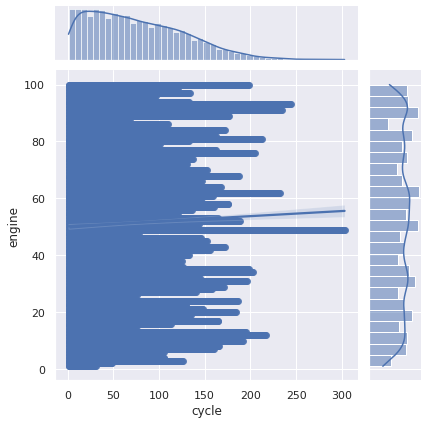

In [ ]:
#distribution of cycle and engine
sns.jointplot("cycle", "engine", data = test_data, kind='reg')

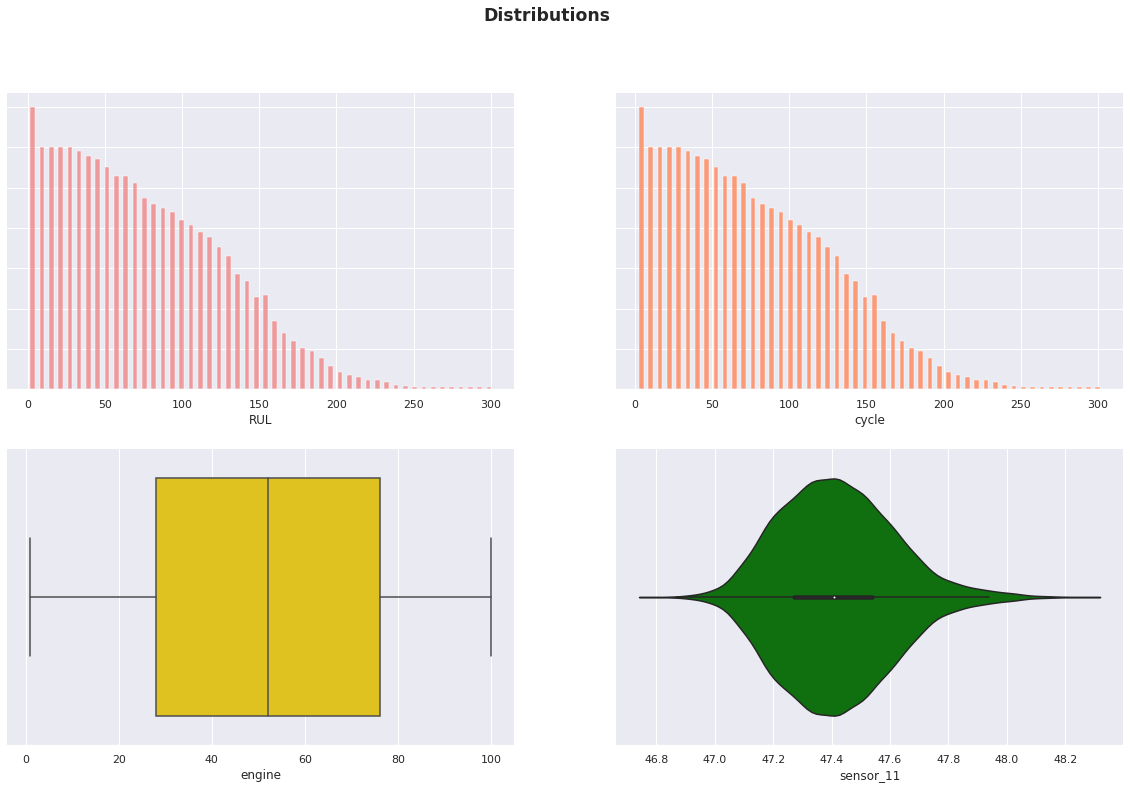

In [ ]:
#Plot distribution of certain variables
fig=plt.figure(figsize=(20,12),facecolor='white')

plt.suptitle('Distributions',weight='bold',fontsize='xx-large')

gs=fig.add_gridspec(2,2)

ax=[_ for i in range(4)]

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])
ax[2]=fig.add_subplot(gs[1,0])
ax[3]=fig.add_subplot(gs[1,1])


sns.histplot(x="RUL",data=data,ax=ax[0],shrink=0.5,bins=50,color="lightcoral")
sns.histplot(x="cycle",data=data,ax=ax[1],shrink=0.5,bins=50,color="coral")
sns.boxplot(x="engine",data=data,ax=ax[2],color='gold')
sns.violinplot(x="sensor_11",data=data,ax=ax[3],color="green")

for i in range(4):
    
    ax[i].set_yticklabels('')
    ax[i].set_ylabel('')
    ax[i].tick_params('y',length=0)
    
    for direction in ['top','left','right']:
        
        ax[i].spines[direction].set_visible(False)

In [ ]:
#scatter matrix
#fig = px.scatter_matrix(test_data)
#fig.show()

In [ ]:
#funnel plot of cycle and RUL
fig = go.Figure(go.Funnel(
    y = data['cycle'],
    x = data['RUL'],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat","blue",]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}})
    )

fig.show()

In [ ]:
#funnel plot of engine and rul colored by cycle
fig = px.funnel(data, x='engine', y='RUL', color='cycle')
fig.show()

In [ ]:
#polar plot of engine and rul
fig = px.scatter_polar(data, r="engine", theta="RUL")
fig.show()

In [ ]:
#Parallel Coordinates plot of engine, cycle and the two settigns by RUL
fig = px.parallel_coordinates(data, color="RUL",
                              dimensions=['engine', 'cycle', 'setting_1',
                                          'setting_2'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

In [ ]:
from mpl_toolkits.mplot3d import axes3d 

In [ ]:
#3-D scatter plot of rleationship between rul
fig = px.scatter_3d(data, x='engine', y='cycle', z='RUL')
fig.show()

In [ ]:
#line plot of (Brownian )motion between engine, cycle and rul
fig = go.Figure(data=go.Scatter3d(
    x=test_data['engine'], y=test_data['cycle'], z=test_data['RUL'],
    marker=dict(
        size=4,
        color=test_data['engine'],
        colorscale='Viridis',
    ),
    line=dict(
        color='darkblue',
        width=2
    )
))

fig.update_layout(
    width=800,
    height=700,
    autosize=False,
    scene=dict(
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=0,
                y=1.0707,
                z=1,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

fig.show()

In [ ]:
#3-D scatter plot of rleationship between rul, cyle, sensor 17 by engine
fig = px.scatter_3d(data, x='RUL', y='cycle', z='sensor_17',
              color='engine')
fig.show()

In [ ]:
#3d line plot of setting 1, sensor 1, RUL by colored by engine
fig = px.line_3d(test_data, x="setting_1", y="sensor_1", z="RUL", color='engine')
fig.show()

In [ ]:
test_data.head(3)

engine  cycle  setting_1  setting_2  setting_3  sensor_1  sensor_2  \
0       1      1     0.0023     0.0003      100.0    518.67    643.02   
1       1      2    -0.0027    -0.0003      100.0    518.67    641.71   
2       1      3     0.0003     0.0001      100.0    518.67    642.46   

   sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  sensor_8  sensor_9  \
0   1585.29   1398.21     14.62     21.61    553.90   2388.04   9050.17   
1   1588.45   1395.42     14.62     21.61    554.85   2388.01   9054.42   
2   1586.94   1401.34     14.62     21.61    554.11   2388.05   9056.96   

   sensor_10  sensor_11  sensor_12  sensor_13  sensor_14  sensor_15  \
0        1.3       47.2     521.72    2388.03    8125.55     8.4052   
1        1.3       47.5     522.16    2388.06    8139.62     8.3803   
2        1.3       47.5     521.97    2388.03    8130.10     8.4441   

   sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  RUL  
0       0.03        392       2388      100.0      38.86    23.3735   30  
1       0.03        393       2388      100.0      39.02    23.3916   29  
2       0.03        393       2388      100.0      39.08    23.4166   28

In [ ]:
#density contour of engine & RUL train data
fig = px.density_contour(data, x="engine", y="RUL")
fig.show()

In [ ]:
#desnity contour of cycle RUL
fig = px.density_contour(test_data, x="cycle", y="RUL", marginal_x="histogram", marginal_y="histogram")
fig.show()

In [ ]:
#test data
fig = px.density_contour(test_data, x="engine", y="RUL")
fig.update_traces(contours_coloring="fill", contours_showlabels = True)
fig.show()

In [ ]:
#density contour of average
fig = px.density_contour(data, x="setting_1", y="sensor_1", histfunc="avg")
fig.update_traces(contours_coloring="fill", contours_showlabels = True)
fig.show()

In [ ]:
fig = go.Figure(go.Histogram2dContour(
        x= data['sensor_8'],
        y= test_data['RUL'],
         colorscale = 'Blues'
))
fig.show()

In [ ]:
data.head()

engine  cycle  setting_1  setting_2  setting_3  sensor_1  sensor_2  \
0       1      1     0.0023     0.0003      100.0    518.67    643.02   
1       1      2    -0.0027    -0.0003      100.0    518.67    641.71   
2       1      3     0.0003     0.0001      100.0    518.67    642.46   
3       1      4     0.0042     0.0000      100.0    518.67    642.44   
4       1      5     0.0014     0.0000      100.0    518.67    642.51   

   sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  sensor_8  sensor_9  \
0   1585.29   1398.21     14.62     21.61    553.90   2388.04   9050.17   
1   1588.45   1395.42     14.62     21.61    554.85   2388.01   9054.42   
2   1586.94   1401.34     14.62     21.61    554.11   2388.05   9056.96   
3   1584.12   1406.42     14.62     21.61    554.07   2388.03   9045.29   
4   1587.19   1401.92     14.62     21.61    554.16   2388.01   9044.55   

   sensor_10  sensor_11  sensor_12  sensor_13  sensor_14  sensor_15  \
0        1.3      47.20     521.72    2388.03    8125.55     8.4052   
1        1.3      47.50     522.16    2388.06    8139.62     8.3803   
2        1.3      47.50     521.97    2388.03    8130.10     8.4441   
3        1.3      47.28     521.38    2388.05    8132.90     8.3917   
4        1.3      47.31     522.15    2388.03    8129.54     8.4031   

   sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  RUL  
0       0.03        392       2388      100.0      38.86    23.3735   30  
1       0.03        393       2388      100.0      39.02    23.3916   29  
2       0.03        393       2388      100.0      39.08    23.4166   28  
3       0.03        391       2388      100.0      39.00    23.3737   27  
4       0.03        390       2388      100.0      38.99    23.4130   26

**Analysis**

In [ ]:
test_data['increasing']=test_data['sensor_2']+ test_data['sensor_3']+ test_data['sensor_4']+test_data['sensor_8']+test_data['sensor_13']+ test_data['sensor_15']+test_data['sensor_17']

data['increasing']=data['sensor_2']+ data['sensor_3']+ data['sensor_4']+data['sensor_8']+data['sensor_13']+ data['sensor_15']+data['sensor_17']

In [ ]:
data['decreasing']=data['sensor_7']+data['sensor_12'] + data['sensor_20'] + data['sensor_21']

test_data['decreasing']=test_data['sensor_7']+test_data['sensor_12'] + test_data['sensor_20'] + test_data['sensor_21']

In [ ]:
def plot_sensor(sensor_name,X):
    plt.figure(figsize=(13,5))
    for i in X['engine'].unique():
        if (i % 10 == 0):  # only plot every engine
            plt.plot('RUL', sensor_name, 
                     data=X[X['engine']==i])
            #plt.axvline(60, color='red', linestyle='dashed', linewidth=4)
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Use fulLife')
    plt.show()

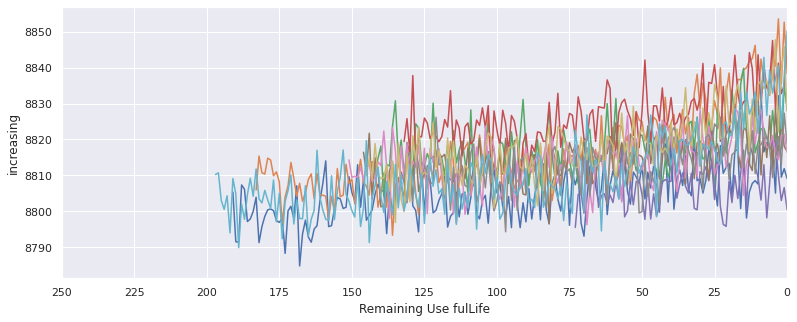

In [ ]:
plot_sensor('increasing',data)

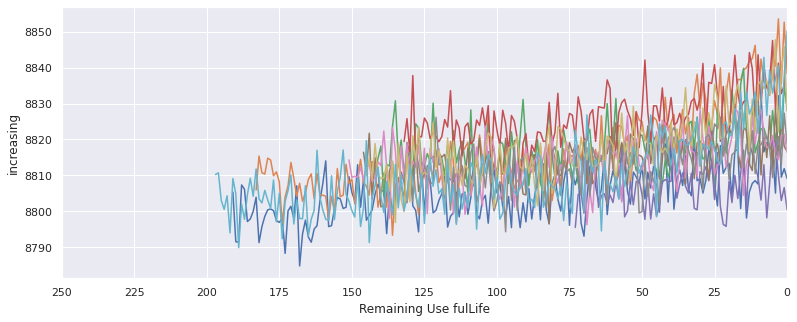

In [ ]:
plot_sensor('increasing',test_data)

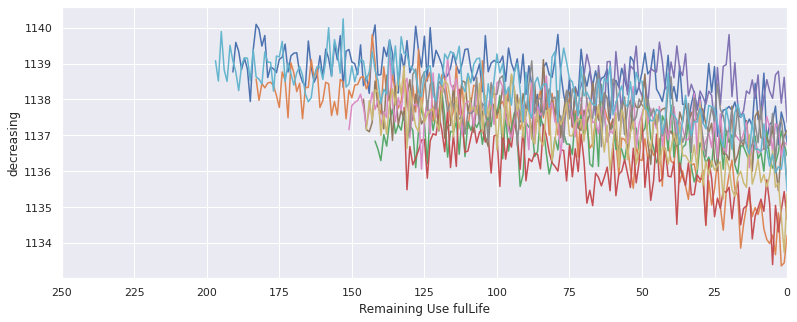

In [ ]:
plot_sensor('decreasing',data)

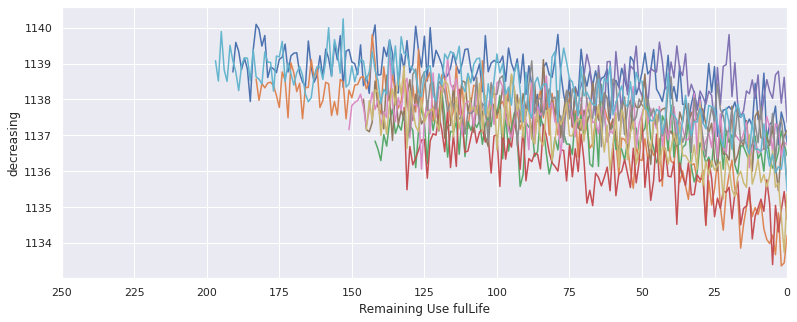

In [ ]:
plot_sensor('decreasing',test_data)

In [ ]:
from scipy.signal import savgol_filter

In [ ]:
#Check correlation for the increasing trend sensors first

def get_correlation_plots(component,a,train_PCA,x=250,y=25):
    plt.figure(figsize=(10,4))
    for engine in train_PCA.engine.unique():
        if engine%10==0:
            data= train_PCA[train_PCA['engine']==engine]
            y1=data[component].ewm(com=0.1).mean()
            y1= savgol_filter(y1, a, 3)
            #plt.figure(figsize=(10,4))
            plt.plot(data['RUL'],y1)
            #plt.plot(random['RUL'], random['ssensor_2'])
            plt.xlim(x, 0)  # reverse the x-axis so RUL counts down to zero
            plt.xticks(np.arange(0, x, y))
            plt.ylabel('Exponential Weighted Moving Average')
            plt.xlabel('Remaining Use fulLife')
            plt.grid(True)
    plt.show()

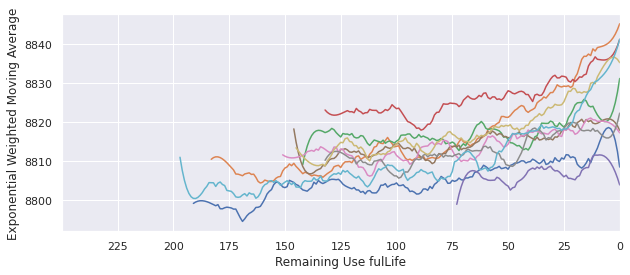

In [ ]:
get_correlation_plots('increasing',21,data)

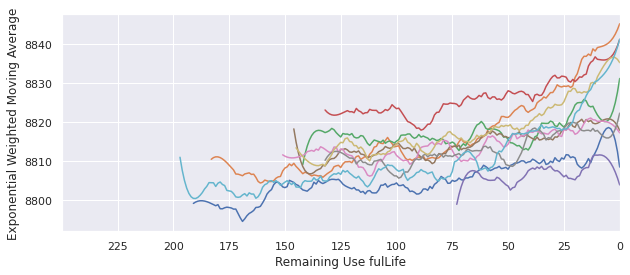

In [ ]:
get_correlation_plots('increasing',21,test_data)

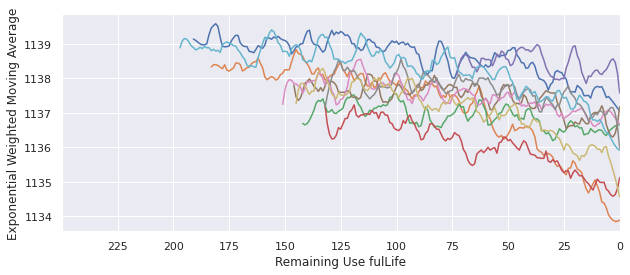

In [ ]:
get_correlation_plots('decreasing',11,data)

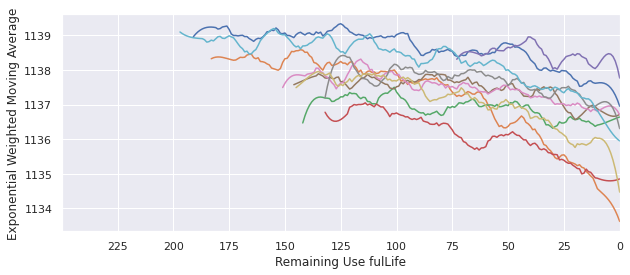

In [ ]:
get_correlation_plots('decreasing',21,test_data)

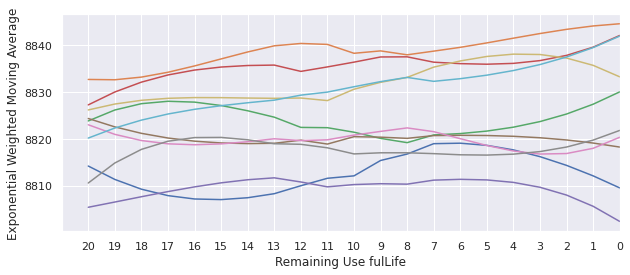

In [ ]:
get_correlation_plots('increasing',15,data[data['RUL']<21],21,1)

In [ ]:
corr_train=[]

for engine in data.engine.unique():
    X= data[data['engine']==engine]
    x1=X['increasing'].ewm(com=0.5).mean()
    x1= savgol_filter(x1, 27, 3)
    corr_train.append(x1)

In [ ]:
corr_test=[]

for engine in test_data.engine.unique():
    data1= test_data[test_data['engine']==engine]
    y1=data1['increasing'].ewm(com=0.5).mean()
    y1= savgol_filter(y1, 27, 3)
    corr_test.append(y1)

In [ ]:
def get_flat_list(comp):
    flat_list = [item for sublist in comp for item in sublist]
    return flat_list

corr_train=get_flat_list(corr_train)

corr_test=get_flat_list(corr_test)

In [ ]:
data['EWM']= corr_train

test_data['EWM']=corr_test

In [ ]:
data['week']= (data['RUL']/7).astype(int)

test_data['week']= (data['RUL']/7).astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'RUL for risky EWMA per week')

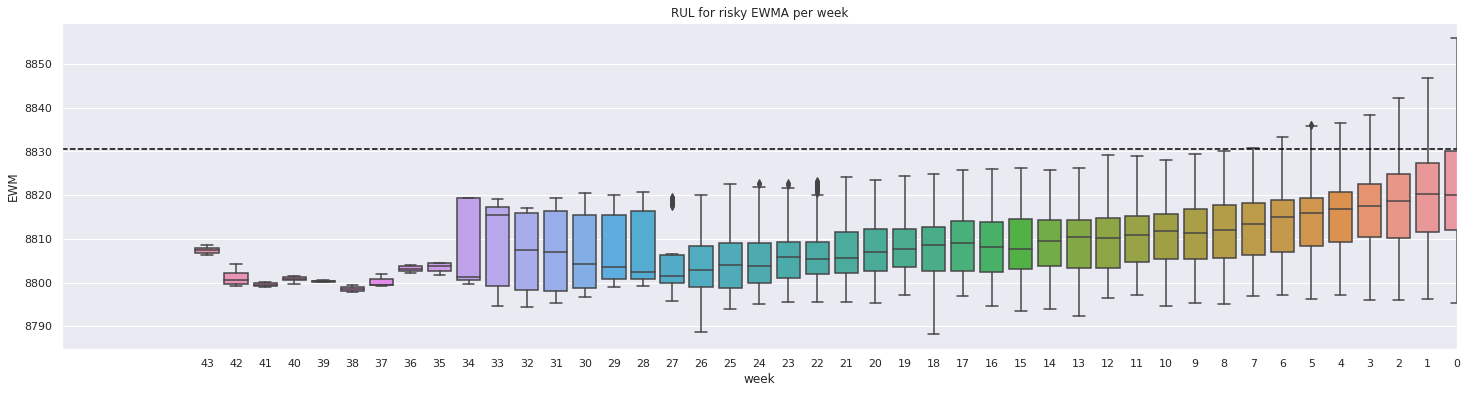

In [ ]:
plt.figure(figsize=(25,6))

sns.boxplot('week','EWM',data=data)
plt.xlim(48,0)
plt.axhline(8830.59,color='black', linestyle='dashed', linewidth=1.5)

#plt.axhline(1139.63,color='black', linestyle='dashed', linewidth=1.5)
plt.title('RUL for risky EWMA per week')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'RUL for risky EWMA per week')

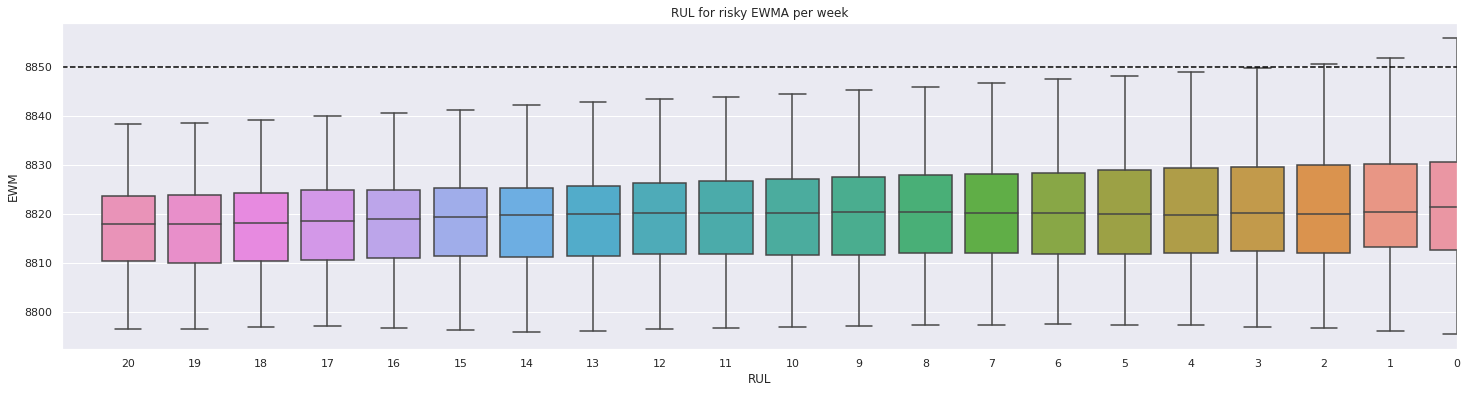

In [ ]:
plt.figure(figsize=(25,6))

sns.boxplot('RUL','EWM',data=data[data['RUL']<21])
plt.xlim(21,0)
plt.axhline(8850,color='black', linestyle='dashed', linewidth=1.5)

#plt.axhline(1139.63,color='black', linestyle='dashed', linewidth=1.5)
plt.title('RUL for risky EWMA per week')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'RUL for risky EWMA per week')

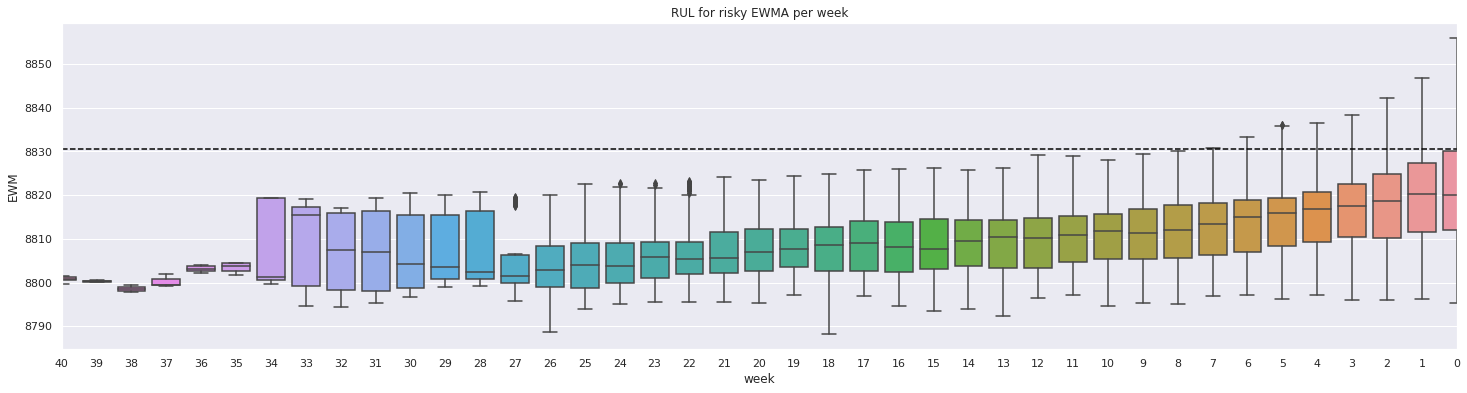

In [ ]:
plt.figure(figsize=(25,6))

sns.boxplot('week','EWM',data=test_data)
plt.xlim(40,0)
plt.axhline(8830.59,color='black', linestyle='dashed', linewidth=1.5)

#plt.axhline(1139.63,color='black', linestyle='dashed', linewidth=1.5)
plt.title('RUL for risky EWMA per week')

In [ ]:
data['Health']='Healthy'

test_data['Health']='Healthy'

In [ ]:
def get_health(data):
    for i in range(len(data)):
        if data.loc[i,'RUL']<30:
            if data.loc[i,'EWM']>8830:
                data.loc[i,'Health']='Unhealthy'
            else:
                data.loc[i,'Health']= 'Health cannot be determined'
                cycle= data.loc[i,'cycle']
                engine= data.loc[i,'engine']
                print(f'Cannot determine health for engine cycle Check manually for Engine {engine}: Cycle {cycle}')
    #data.dropna(inplace= True)
    return data

In [ ]:
data= get_health(data)

Cannot determine health for engine cycle Check manually for Engine 1: Cycle 2
Cannot determine health for engine cycle Check manually for Engine 1: Cycle 3
Cannot determine health for engine cycle Check manually for Engine 1: Cycle 4
Cannot determine health for engine cycle Check manually for Engine 1: Cycle 5
Cannot determine health for engine cycle Check manually for Engine 1: Cycle 6
Cannot determine health for engine cycle Check manually for Engine 1: Cycle 7
Cannot determine health for engine cycle Check manually for Engine 1: Cycle 8
Cannot determine health for engine cycle Check manually for Engine 1: Cycle 9
Cannot determine health for engine cycle Check manually for Engine 1: Cycle 10
Cannot determine health for engine cycle Check manually for Engine 1: Cycle 11
Cannot determine health for engine cycle Check manually for Engine 1: Cycle 12
Cannot determine health for engine cycle Check manually for Engine 1: Cycle 13
Cannot determine health for engine cycle Check manually for 

In [ ]:
test_data = get_health(test_data)

Cannot determine health for engine cycle Check manually for Engine 1: Cycle 2
Cannot determine health for engine cycle Check manually for Engine 1: Cycle 3
Cannot determine health for engine cycle Check manually for Engine 1: Cycle 4
Cannot determine health for engine cycle Check manually for Engine 1: Cycle 5
Cannot determine health for engine cycle Check manually for Engine 1: Cycle 6
Cannot determine health for engine cycle Check manually for Engine 1: Cycle 7
Cannot determine health for engine cycle Check manually for Engine 1: Cycle 8
Cannot determine health for engine cycle Check manually for Engine 1: Cycle 9
Cannot determine health for engine cycle Check manually for Engine 1: Cycle 10
Cannot determine health for engine cycle Check manually for Engine 1: Cycle 11
Cannot determine health for engine cycle Check manually for Engine 1: Cycle 12
Cannot determine health for engine cycle Check manually for Engine 1: Cycle 13
Cannot determine health for engine cycle Check manually for 

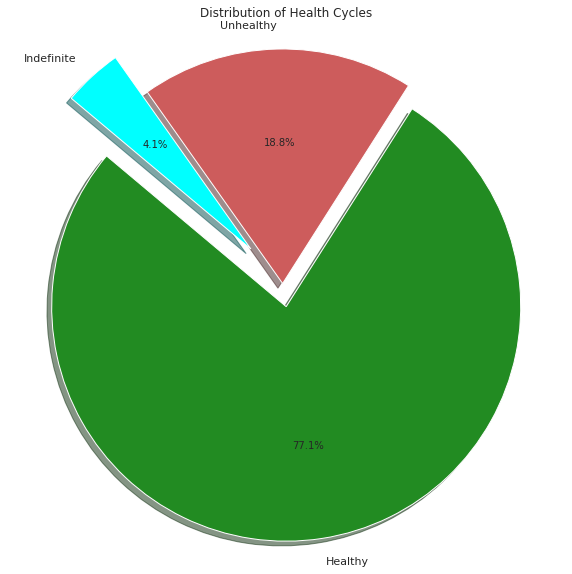

In [ ]:
plt.figure(figsize=(10,10))

# Data to plot
labels= 'Healthy','Unhealthy','Indefinite'
sizes = data['Health'].value_counts()
colors = ['forestgreen','indianred','cyan']
explode = (0.1, 0,0.2)  # explode 3rd slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')

plt.title('Distribution of Health Cycles')
plt.show()

In [ ]:
drop_sensor=['sensor_1',
 'sensor_5',
 'sensor_6',
 'sensor_10',
 'sensor_16',
 'sensor_18',
 'sensor_19']

In [ ]:
test_data['Health'].value_counts()

Healthy                        10096
Health cannot be determined     2464
Unhealthy                        536
Name: Health, dtype: int64

***Modeling***

In [ ]:
X_train_clf= data.drop(columns=['engine', 'cycle', 'setting_1', 'setting_2', 'setting_3','Health']+drop_sensor)

X_test_clf= test_data.drop(columns=['engine', 'cycle', 'setting_1', 'setting_2', 'setting_3','Health']+drop_sensor)

In [ ]:
X_test_clf.columns

Index(['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
       'sensor_17', 'sensor_20', 'sensor_21', 'RUL', 'increasing',
       'decreasing', 'EWM', 'week'],
      dtype='object')

In [ ]:
y_train_clf = data['Health']

y_test_clf= test_data['Health']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_train_clf, y_train_clf = smote.fit_resample(X_train_clf, y_train_clf)

In [ ]:
X_test_clf,y_test_clf=smote.fit_resample(X_test_clf,y_test_clf)

In [ ]:
#KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_clf, y_train_clf)

KNeighborsClassifier()

In [ ]:
print(classification_report(y_train_clf, classifier.predict(X_train_clf)))

                             precision    recall  f1-score   support

Health cannot be determined       0.99      1.00      0.99     10096
                    Healthy       1.00      0.99      0.99     10096
                  Unhealthy       1.00      1.00      1.00     10096

                   accuracy                           1.00     30288
                  macro avg       1.00      1.00      1.00     30288
               weighted avg       1.00      1.00      1.00     30288



In [ ]:
print(classification_report(y_test_clf, classifier.predict(X_test_clf)))

                             precision    recall  f1-score   support

Health cannot be determined       0.99      1.00      0.99     10096
                    Healthy       1.00      0.99      0.99     10096
                  Unhealthy       1.00      1.00      1.00     10096

                   accuracy                           1.00     30288
                  macro avg       1.00      1.00      1.00     30288
               weighted avg       1.00      1.00      1.00     30288



In [ ]:
X_train_reg= data[data['Health']=='Unhealthy'].drop(columns=['engine', 'cycle', 'setting_1', 'setting_2', 'setting_3','Health','RUL']+drop_sensor)

X_test_reg= test_data[test_data['Health']=='Unhealthy'].drop(columns=['engine', 'cycle', 'setting_1', 'setting_2', 'setting_3','Health','RUL']+drop_sensor)

In [ ]:
y_train_reg= data[data['Health']=='Unhealthy']['RUL']

f_scores = f_regression(X_train_reg,y_train_reg)

Text(0.5, 1.0, 'F-score  for numerical features')

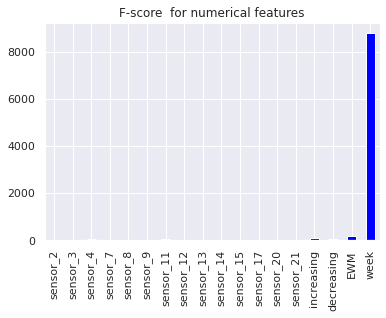

In [ ]:
#The first array consists of f score-values that we need

p_series= pd.Series(f_scores[0],index= X_train_reg.columns)

p_series.plot(kind='bar',color='blue')

plt.title('F-score  for numerical features')

In [ ]:
least_f=['sensor_2','sensor_3','sensor_7','sensor_8','sensor_9','sensor_11']

In [ ]:
X_train_reg= data[data['Health']=='Unhealthy'].drop(columns=['engine', 'cycle', 'setting_1', 'setting_2', 'setting_3','Health','RUL']+drop_sensor+least_f)

X_test_reg= test_data[test_data['Health']=='Unhealthy'].drop(columns=['engine', 'cycle', 'setting_1', 'setting_2', 'setting_3','Health','RUL']+drop_sensor+least_f)

In [ ]:
y_train_reg= data[data['Health']=='Unhealthy']['RUL']

y_test_reg= test_data[test_data['Health']=='Unhealthy']['RUL']

In [ ]:
#Random Forest Regressor param_dict
n_estimators = [30,50,80,100,120,150]
max_depth = [4,6,8,10,12]
min_samples_split = [50,80,100,150,200]
min_samples_leaf = [10,30,40,50,60,80]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
# Create an instance of the random forest regressor
rf_model = RandomForestRegressor()

#RandomSearch
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=0,cv=5)
rf_random.fit(X_train_reg,y_train_reg)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [4, 6, 8, 10, 12],
                                        'min_samples_leaf': [10, 30, 40, 50, 60,
                                                             80],
                                        'min_samples_split': [50, 80, 100, 150,
                                                              200],
                                        'n_estimators': [30, 50, 80, 100, 120,
                                                         150]})

In [ ]:
#Building optimal model on the best estimators
rf_optimal_model = rf_random.best_estimator_

# make predictions for test data
y_hat = rf_optimal_model.predict(X_test_reg)

In [ ]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [ ]:
rms=[]

sma=[]

model=[]

variance=[]

In [ ]:
#This function calculates R2, SMAPE and RMSE for the models that we enter for test and train sets
def evaluate(m,y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    var = r2_score(y_true, y_hat)
    s= smape(y_true,y_hat)
    print('{}: {} set RMSE:{}, SMAPE: {}, R Squared : {}'.format(m,label, rmse,s,var))
    rms.append(rmse)
    sma.append(s)
    model.append(m)
    variance.append(var)

In [ ]:
evaluate('Random Forest Regressor',y_train_reg,rf_optimal_model.predict(X_train_reg),'train')

Random Forest Regressor: train set RMSE:2.076239059006662, SMAPE: 31.870114346957703, R Squared : 0.9387015927193197


In [ ]:
evaluate('Random Forest Regressor',y_test_reg,y_hat)

Random Forest Regressor: test set RMSE:2.076239059006662, SMAPE: 31.870114346957703, R Squared : 0.9387015927193197


In [ ]:
# create and fit model
lm = LinearRegression()
lm.fit(X_train_reg, y_train_reg)

# predict and evaluate
y_hat_train_reg = lm.predict(X_train_reg)
evaluate('Linear Regression',y_train_reg, y_hat_train_reg, 'train')

y_hat_test = lm.predict(X_test_reg)
evaluate('Linear Regression',y_test_reg, y_hat_test)

Linear Regression: train set RMSE:1.974465324813113, SMAPE: 31.753236242832962, R Squared : 0.9445637941365447
Linear Regression: test set RMSE:1.974465324813113, SMAPE: 31.753236242832962, R Squared : 0.9445637941365447


In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the XGBoost
xgb_model = XGBRegressor(learning_rate=0.1)

#RandomSearch
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=2,cv=5)


xgb_random.fit(X_train_reg,y_train_reg)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[19:56:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=50; total time=   0.1s
[19:56:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=50; total time=   0.0s
[19:56:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=50; total time=   0.1s
[19:56:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=50; total time=   0.0s
[19:56:57] WARNING: /wo

RandomizedSearchCV(cv=5, estimator=XGBRegressor(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   verbose=2)

In [ ]:
#Building optimal model on the best estimators
xgb_model = xgb_random.best_estimator_

In [ ]:
# make predictions for test data
y_pred = xgb_model.predict(X_test_reg)

y_hat_train_reg = xgb_model.predict(X_train_reg)

In [ ]:
y_pred

array([ 9.128003  ,  8.833687  ,  8.514235  ,  3.236342  ,  4.1348987 ,
        2.5081732 ,  2.0499363 ,  2.230716  ,  2.1025157 , 23.615652  ,
       23.043625  , 22.934387  , 17.954601  , 17.517546  , 17.789022  ,
       17.7999    , 16.785423  , 15.74155   , 15.794419  , 11.515812  ,
       11.317487  , 10.711378  ,  9.757899  , 10.206683  ,  8.705622  ,
        7.959667  ,  4.8491836 ,  3.6801527 ,  3.1802614 ,  2.820513  ,
        2.4898272 ,  1.8392259 ,  1.8132857 ,  7.653091  ,  5.3530536 ,
        4.3312197 ,  3.693236  ,  3.0889099 ,  2.2666097 ,  1.775993  ,
        2.4271302 , 27.931223  , 24.560793  , 24.126997  , 24.312254  ,
       24.037083  , 22.969131  , 22.109629  , 22.23023   , 17.352587  ,
       17.247692  , 16.962914  , 16.300097  , 15.61295   , 16.120213  ,
       14.153057  , 10.77572   , 10.904067  , 10.349358  ,  9.575835  ,
        9.762048  ,  9.29482   ,  8.910687  ,  3.811691  ,  3.9335566 ,
        3.7499177 ,  2.1012335 ,  2.7302694 ,  2.3593643 ,  1.40

In [ ]:
# predict and evaluate
y_hat_train_reg = xgb_model.predict(X_train_reg)
evaluate('XGBoost Regressor',y_train_reg, y_hat_train_reg, 'train')
evaluate('XGBoost Regressor',y_test_reg, y_pred)

XGBoost Regressor: train set RMSE:1.2879074596292406, SMAPE: 24.328418828581288, R Squared : 0.9764134840773983
XGBoost Regressor: test set RMSE:1.2879074596292406, SMAPE: 24.328418828581288, R Squared : 0.9764134840773983


In [ ]:
reg = lgb.LGBMRegressor()
reg.fit(X_train_reg, y_train_reg)

LGBMRegressor()

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the XGBoost
lgb_model = lgb.LGBMRegressor(learning_rate=0.05)

#RandomSearch
lgb_random = RandomizedSearchCV(lgb_model,param_dict,verbose=2,cv=5)
# Maximum depth of trees
max_depth = [4,6,8]


lgb_random.fit(X_train_reg,y_train_reg)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.0s
[CV] END max_depth=6, min_

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(learning_rate=0.05),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   verbose=2)

In [ ]:
#Building optimal model on the best estimators
lgb_model = lgb_random.best_estimator_

# make predictions for test data
y_pred_lgb = lgb_model.predict(X_test_reg)

y_hat_train_reg =  lgb_model.predict(X_train_reg)

In [ ]:
# predict and evaluate
evaluate('Light GBM Regressor',y_train_reg, y_hat_train_reg, 'train')
evaluate('Light GBM Regressor',y_test_reg, y_pred_lgb)

Light GBM Regressor: train set RMSE:1.5969674375987999, SMAPE: 27.281501046758976, R Squared : 0.963735090469113
Light GBM Regressor: test set RMSE:1.5969674375987999, SMAPE: 27.281501046758976, R Squared : 0.963735090469113


In [ ]:
model=['Random Forest Regressor','Linear Regression','XGBoost Regressor','Light GBM Regressor']

In [ ]:
rmse_train= []

smape_train= []

rmse_test=[]

smape_test=[]

r_train=[]

r_test=[]

for i in range(len(rms)):
    if i%2==0:
        rmse_train.append(rms[i])
        smape_train.append(sma[i])
        r_train.append(variance[i])
    else:
        rmse_test.append(rms[i])
        smape_test.append(sma[i])
        r_test.append(variance[i])

In [ ]:
scores=pd.DataFrame()
scores['Model']=model
scores['RMSE Train']=rmse_train

scores['R_Squared Train']= r_train

scores['R_Squared Test']= r_test

scores['RMSE Test']= rmse_test

scores['SMAPE Train']= smape_train

scores['SMAPE Test']=smape_test

In [ ]:
scores

Model  RMSE Train  R_Squared Train  R_Squared Test  \
0  Random Forest Regressor    2.076239         0.938702        0.938702   
1        Linear Regression    1.974465         0.944564        0.944564   
2        XGBoost Regressor    1.287907         0.976413        0.976413   
3      Light GBM Regressor    1.596967         0.963735        0.963735   

   RMSE Test  SMAPE Train  SMAPE Test  
0   2.076239    31.870114   31.870114  
1   1.974465    31.753236   31.753236  
2   1.287907    24.328419   24.328419  
3   1.596967    27.281501   27.281501

<Figure size 1440x720 with 0 Axes>

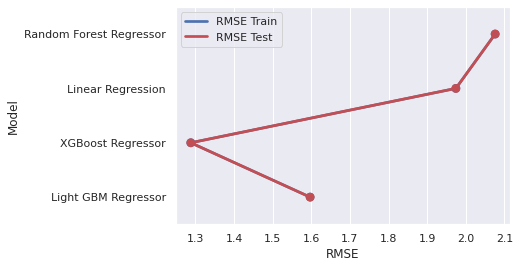

In [ ]:
ax=plt.figure(figsize=(20,10))
# creating subplots
ax = plt.subplots()
# plotting columns
ax = sns.pointplot(x=scores["RMSE Train"], y=scores["Model"], color='b',alpha=0.2,labels=('RMSE SCORE TRAIN'))
ax = sns.pointplot(x=scores["RMSE Test"], y=scores["Model"], color='r',alpha=0.7,labels=('RMSE SCORE TEST'))
# renaming the axes
ax.set(xlabel="RMSE", ylabel="Model")
ax.legend(handles=ax.lines[::len(scores)+1], labels=["RMSE Train","RMSE Test"])


# visulaizing illustration
plt.show()

In [ ]:
y_actual= y_test_reg.tolist()

y_pred= y_pred.tolist()

In [ ]:
index=[]
for i in range (len(y_actual)):
    index.append(i)

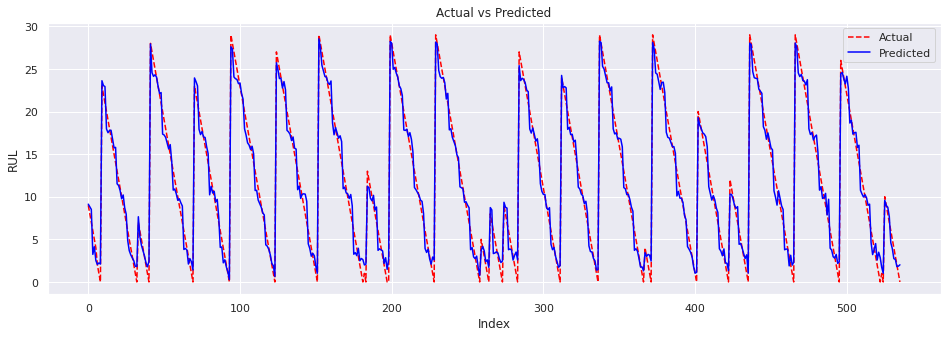

In [ ]:
plt.figure(figsize=(16,5))

plt.plot(index,y_actual,color='red',linestyle='dashed')

plt.plot(index,y_pred,color='blue')

plt.ylabel('RUL')

plt.xlabel('Index')

plt.title('Actual vs Predicted')

plt.legend(['Actual','Predicted'])

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(xgb_model)
# Calculate Shap values
shap_values =shap.TreeExplainer(xgb_model).shap_values(pd.DataFrame(X_train_reg, columns=X_train_reg.columns))

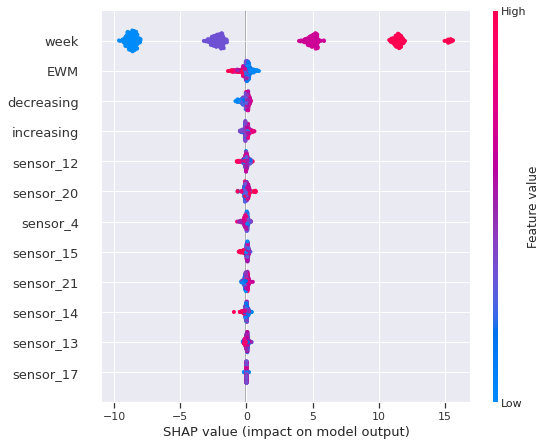

In [ ]:
shap.summary_plot(shap_values, X_train_reg, feature_names=X_train_reg.columns.tolist())